In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle


In [2]:
# Importing the dataset
xt = pd.read_csv('dengue_features_train.csv')
yt = pd.read_csv('dengue_labels_train.csv')
wt = pd.read_csv('dengue_features_test.csv')

In [3]:
X = xt.iloc[:,4:].values
y = yt.iloc[:, 3].values
w = wt.iloc[:,4:].values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer = imputer.fit(w)
w = imputer.transform(w)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Linear Regressor - Two-Fold

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [8]:
pred = LR.predict(X_test)

In [9]:
test_set_rmse_LR = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2_LR = r2_score(y_test, pred)


In [10]:
print(test_set_rmse_LR)
print(test_set_r2_LR)

42.4193369908355
0.12752591219727538


In [11]:
# Note that for rmse, the lower that value is, the better the fit

# The closer towards 1, the better the fit



# MLP - Neural Network

In [12]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

MLPClassifier()

In [13]:
y_pred = MLP.predict(w)

In [14]:
test_set_rmse_MLP = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2_MLP = r2_score(y_test, pred)


In [15]:
predictions = MLP.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MLP: ", val4*10, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))

*Accuracy score for MLP:  61.64383561643835 

*Confusion Matrix for MLP: 
[[7 0 1 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.19      0.35      0.25        20
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        17
           3       0.05      0.15      0.07        13
           4       0.00      0.00      0.00        10
           5       0.08      0.44      0.13        16
           6       0.09      0.05      0.06        20
           7       0.04      0.08      0.05        13
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         4
          13    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

# Support Vector Machine Classifier

In [16]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)


In [17]:
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1*10, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  68.4931506849315 

*Confusion Matrix for SVM: 
[[20  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [17  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        20
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        10
          12       0.00      0.00  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGB - Booster

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)


In [19]:
models = []
mse = []
mae = []
rmse = []

In [20]:
models.append('XGBoost')
mse.append(round(mean_squared_error(pred, y_test),2))
mae.append(round(mean_absolute_error(pred, y_test),2))
rmse.append(round(np.sqrt(mean_squared_error(pred, y_test)),2))
print(mse)
print(mae)
print(rmse)

[1344.44]
[21.8]
[36.67]


In [21]:
#test_set_r2_XGB = r2_score(y_test, y_pred)
#print(test_set_r2_XGB)

# Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=300,random_state=0)
RF.fit(X,y)



RandomForestRegressor(n_estimators=300, random_state=0)

In [23]:
# Predicting a new result
y_pred = RF.predict(X_test)

In [24]:
test_set_rmse_RF = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2_RF = r2_score(y_test, y_pred)

In [25]:
print(test_set_rmse_RF)
print(test_set_r2_RF)

13.768855556128678
0.9080777866929082


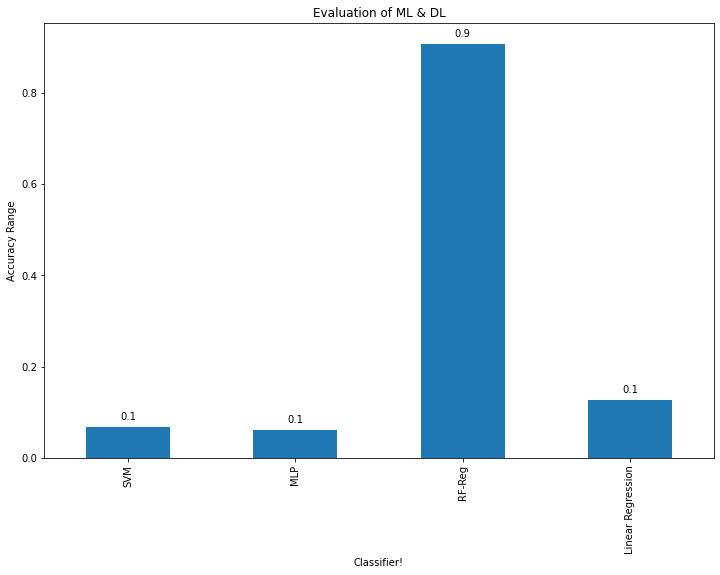

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1/100,val4/100,test_set_r2_RF,test_set_r2_LR]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'MLP','RF-Reg','Linear Regression']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [27]:
filename = 'model.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [28]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from werkzeug.wrappers import Request, Response

In [29]:
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def index():
    return render_template('home.html')

@app.route('/home')
def home():
    return render_template('home.html')
@app.route('/about')
def about():
    return render_template('About.html')

@app.route('/dd')  
def dd():
    return render_template('Disease Description.html')

@app.route('/maps')
def maps():
    return render_template('Maps.html')

@app.route('/prediction')
def prediction():
    return render_template('index.html')



@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [str(x) for x in request.form.values()]
    #a=float(int_features[-2])
    #int_features1 = int_features
    #int_features[0] = x_label.transform(np.array([int_features[0]]))
    #int_features = onehotencoder.transform([int_features]).toarray()
    #int_features = int_features[1:]
    #for i in int_features:
     #  int_features1.append(float(i)) 
    #final_features = int_features

    prediction = model.predict(np.array(int_features).reshape(1,-1))
    output = round(prediction[0], 2)    
    
    #output = round(prediction[0]*100000, 2)

    return render_template('index.html', prediction_text='Number of cases till then will be :{}'.format(output))

@app.route('/visual')
def visual():
    return render_template('visualize.html')

"""@app.route('/predict_api',methods=['POST'])
def predict_api():
    '''
    For direct API calls trought request
    '''
    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output)"""

"@app.route('/predict_api',methods=['POST'])\ndef predict_api():\n    '''\n    For direct API calls trought request\n    '''\n    data = request.get_json(force=True)\n    prediction = model.predict([np.array(list(data.values()))])\n\n    output = prediction[0]\n    return jsonify(output)"

In [ ]:
if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Oct/2021 15:22:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:22:21] "GET /static/css/static/images/background.jpg HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2021 15:22:23] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2021 15:22:26] "GET /prediction HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:22:26] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:22:26] "GET /static/css/static/images/background.jpg HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2021 15:23:33] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:23:33] "GET /static/css/static/images/background.jpg HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2021 15:24:26] "GET /dd HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:24:27] "GET /static/css/static/images/background.jpg HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2021 15:24:54] "GET /maps HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2021 15:24:55] "GET /static/images/2000.jpeg HT